# Q1
(3 pts) What is a neural network? What are the general steps required to build a neural network?

A neural network functions like how a brain wound work. There is an input and an output and then a hidden layer that considers the best ouptut based off data and training. 
To build a neural network in Python, first, clearly define the problem, stating explicitly whether it is a regression or classification model. Then, the dataset must be of high quality, large, and minimally biased. Split the data into training, validation, and test sets. After that, specify the architecture by selecting the number of layers and neurons. Typically, the input layer matches the number of features in your data, hidden layers use some sort of activation function (ReLUs, for example); the output layer is matched to the number of target variables. The activation functions might become something like softmax for classification or linear for regression problems. Train the model: Choose an appropriate loss function-end, such as Mean Squared Error for regression or Cross-Entropy for classification-along with an optimizer such as Adam or Gradient Descent. Use several epochs and batch process with 'performance monitoring' of metrics. Apply dropout, regularization, or data augmentation to improve generalization and avoid overfitting; fine-tune the hyperparameters, such as learning rate or number of neurons. Once the model is trained, evaluate its performance on unseen data using accuracy in the case of a classification task or RMSE for regression. Deploy the trained model to do useful tasks, perhaps in application or API form.

# Q2
(3 pts) Generally, how do you check the performance of a neural network? Why is this the case?

The reason why MSE is commonly used for neural networks on regression tasks is that it punishes large errors harder, which is perfect for those applications where one wants to minimize huge deviations. Being differentiable, it ensures smooth optimization during training and provides a clear quantitative measure of performance. It is simple to compute, interpretable, and lower values indicate better predictions. However, it is sensitive to outliers; hence, other alternatives like MAE or Huber loss may be preferred when dealing with noisy datasets. For classification tasks, metrics such as cross-entropy loss will be more appropriate.

# Q3 
(4 pts) Clean the data or do additional cleaning if you have used the dataset for another assignment. Specify the improvements (at least 2) that you made to your cleaning if you selected the dataset before. If you select one with a low number or records, consider oversampling. 

I added LDA and dimensionality reduction. 

In [25]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error

#reg preprocessing
adult = fetch_ucirepo(id=2)
data_features = pd.DataFrame(adult.data.features, columns=adult.data.feature_names)
data_targets = pd.Series(adult.data.targets.squeeze(), name='income')
data = pd.concat([data_features, data_targets], axis=1)
data = pd.get_dummies(data)
sc = StandardScaler()
numeric_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
data[numeric_cols] = sc.fit_transform(data[numeric_cols])
X = data.drop(['income_<=50K', 'income_>50K'], axis=1).values
y = data['income_>50K'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#LDA
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
#Dimensional reduction
model = LogisticRegression(random_state=42)
model.fit(X_train_lda, y_train)
y_predicted = model.predict(X_test_lda)
#got a bool error
y_test_int = y_test.astype(int)
y_predicted_int = y_predicted.astype(int)
accuracy = model.score(X_test_lda, y_test)
mse = mean_squared_error(y_test_int, y_predicted_int)
print(f"Mean Squared Error: {mse:.4f}")
print(f"Accuracy: {accuracy:f}")


Mean Squared Error: 0.1099
Accuracy: 0.890060


# Q4
(10 pts) Create a neural network using Keras or PyTorch to predict the outcome of your datasets.

In [52]:
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
y = (y == '>50K').astype(int)
import pandas as pd
import torch 
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.nn.functional as F 
diabetes_df = pd.read_csv("diabetes.csv")
X = diabetes_df.drop('Outcome', axis=1).values
y = diabetes_df['Outcome'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)
y_train = torch.LongTensor(y_train)

print(X_train)
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,
                 hidden1=20,hidden2=20,
                 out_features=2):
        super().__init__() 
        """
        super is a computed indirect reference
        which means that it isolates changes and
        makes sure the children in the layers of
        multiple inheritance are calling 
        the right parents
        """
        self.layer_1_connection = nn.Linear(input_features, hidden1)
        self.layer_2_connection = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)

    def forward(self, x):
        x = F.relu(self.layer_1_connection(x))
        x = F.relu(self.layer_2_connection(x))
        x = self.out(x)
        return x

torch.manual_seed(42)
ann = ANN_Model()

loss_function = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(ann.parameters(), lr=0.01, weight_decay=0)
final_loss = []
n_epochs = 500
for epoch in range(n_epochs):
    y_pred = ann.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_loss.append(loss)

    if epoch % 10 == 1:
        print(f'Epoch number: {epoch} with loss {loss}')

    optimizer.zero_grad() 
    loss.backward()
    optimizer.step() 
y_pred_class = y_pred.argmax(dim=1)  # Convert logits to predicted class
mse = torch.mean((y_pred_class.float() - y_train.float())**2)
print(mse)
        

tensor([[  1.0000,  95.0000,  60.0000,  ...,  23.9000,   0.2600,  22.0000],
        [  5.0000, 105.0000,  72.0000,  ...,  36.9000,   0.1590,  28.0000],
        [  0.0000, 135.0000,  68.0000,  ...,  42.3000,   0.3650,  24.0000],
        ...,
        [ 10.0000, 101.0000,  86.0000,  ...,  45.6000,   1.1360,  38.0000],
        [  0.0000, 141.0000,   0.0000,  ...,  42.4000,   0.2050,  29.0000],
        [  0.0000, 125.0000,  96.0000,  ...,  22.5000,   0.2620,  21.0000]])
Epoch number: 1 with loss 0.7168329358100891
Epoch number: 11 with loss 0.6524671912193298
Epoch number: 21 with loss 0.630030632019043
Epoch number: 31 with loss 0.6092545986175537
Epoch number: 41 with loss 0.5873100757598877
Epoch number: 51 with loss 0.5649566650390625
Epoch number: 61 with loss 0.5510146021842957
Epoch number: 71 with loss 0.535936713218689
Epoch number: 81 with loss 0.5241531133651733
Epoch number: 91 with loss 0.5143421292304993
Epoch number: 101 with loss 0.5075693130493164
Epoch number: 111 with los

ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (233).

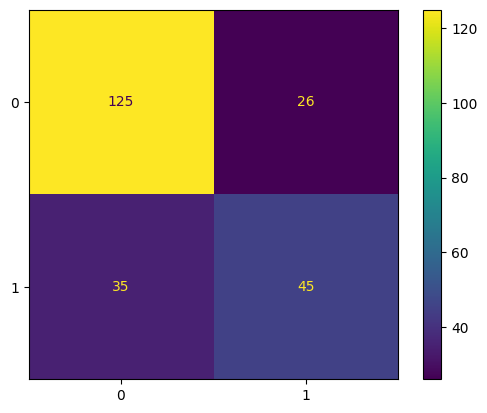

In [53]:
y_pred = []
with torch.no_grad(): 
    for i, data in enumerate(X_test):
        prediction = ann(data)
        y_pred.append(prediction.argmax())
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

# Q5
(5 pts) Compare the performance of the neural networks to another model you created. Which performed better? Why do you think that is?

The dimensionality reduction model gave a performace value of 0.10 vs the py.torch performance is 0.1527. This difference in performance might be related to the overfitting effect, loss of information during dimensionality reduction, or differing hyperparameter tuning of the dimensionality reduction model and PyTorch model. Neural networks capture more complex patterns and are subject to overfitting if not properly regularized, while dimensionality reduction simplifies the feature space, which might be beneficial for generalization. Regarding ways to further enhance the PyTorch model's results, one could think about regularization, hyperparameter tuning, and proper preprocessing of the data.